In [1]:
import isochrones as ic
from isochrones.priors import ChabrierPrior, FehPrior
from isochrones.cluster import StarClusterModel
from isochrones.mist import MIST_Isochrone
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import itertools

In [2]:
# load data
_,_,B, Berr, V, Verr, BV, BVerr = np.loadtxt('cat_test_v3.txt', unpack=True)

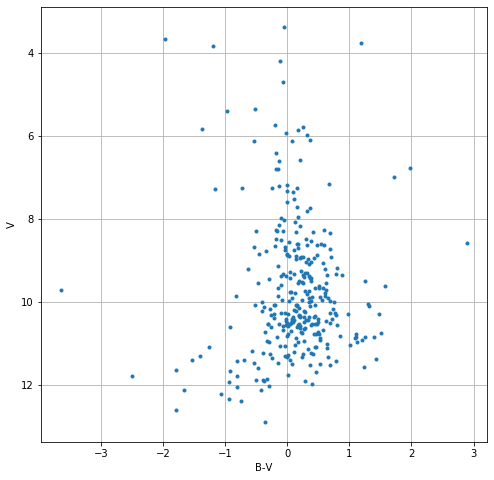

In [3]:
# look at it
plt.figure(figsize=(8,8))
plt.plot(B-V, V, '.')
plt.gca().invert_yaxis()
#plt.xlim([-1., 1.5])
plt.xlabel("B-V")
plt.ylabel("V")
plt.grid()
plt.show()

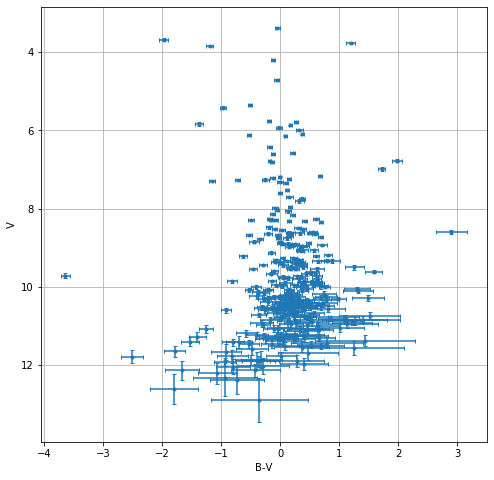

In [4]:
plt.figure(figsize=(8,8))
plt.errorbar(BV, V, xerr=BVerr, yerr=Verr, fmt='.', capsize=2)
plt.gca().invert_yaxis()
#plt.xlim([-1., 1.5])
plt.xlabel("B-V")
plt.ylabel("V")
plt.grid()
plt.show()

In [5]:
# set up isochrones
tracks = ic.get_ichrone('mist', tracks=True, bands=['B', 'V'])

In [6]:
N = 100000 # number of stars for isochrones
masses = ChabrierPrior().sample(N) # masses of the stars
feh = -0.01 # according to simbad for M45
age = np.log10(1e7)  # want the main sequence
distance = 10.  # 10 pc to get abs mag
AV = 0. # we've already corrected for reddening

In [7]:
# get distance from distance modulus
def get_distance(dist_mod, dist_mod_err):
    dist = 10. * 10**(dist_mod/5.)
    err = dist * (np.log(10)/5.) * dist_mod_err
    return dist, abs(err)

In [16]:
# generate the isochrones at various ages
ichrones = {}
ages = [1e6, 5e6, 1e7, 5e7, 7.5e7, 1e8, 2.25e8, 5e8, 1e9]

for age in ages:
    ret = tracks.generate(masses, np.log10(age), 
                      feh, distance=distance, AV=0)
    ret = ret.dropna()
    ichrones[age] = ret

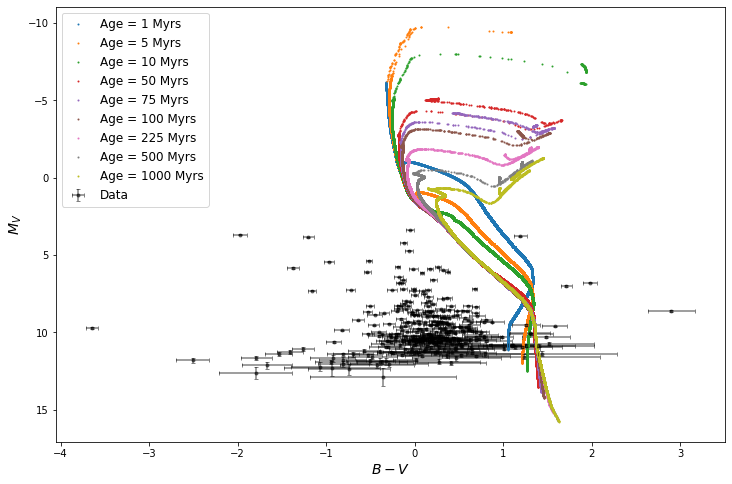

In [20]:
# look at abs mag isochrones and our apparent mag data to find dist modulus

plt.figure(figsize=(12,8))
for age in ages:
    plt.plot(ichrones[age]['B_mag']-ichrones[age]['V_mag'], 
             ichrones[age]['V_mag'], '.', label="Age = {:1.0f} Myrs".format(age/1e6),
            markersize=2)

#plt.plot(B-V, V, '.', label="Data", color='k')
plt.errorbar(BV, V, xerr=BVerr, yerr=Verr, label="Data", 
             fmt='.', capsize=2, alpha=0.5, color='k')
plt.gca().invert_yaxis()
#plt.xlim([-1., 2.]) 
plt.xlabel(r"$B-V$", fontsize=14)
plt.ylabel(r"$M_V$", fontsize=14)

#plt.ylim([9,-5])
plt.legend(fontsize=12)
#plt.savefig('iso_cmd_v1.png', bbox_inches='tight')
plt.show()

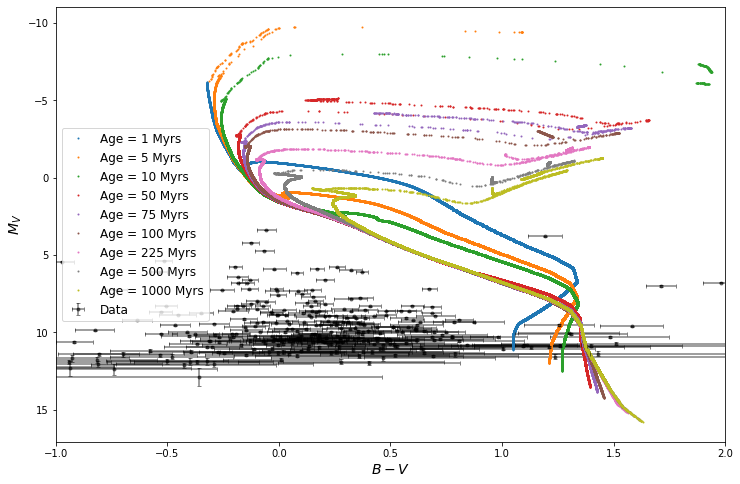

In [23]:
# zoom in a bit

plt.figure(figsize=(12,8))
for age in ages:
    plt.plot(ichrones[age]['B_mag']-ichrones[age]['V_mag'], 
             ichrones[age]['V_mag'], '.', label="Age = {:1.0f} Myrs".format(age/1e6),
            markersize=2)

#plt.plot(B-V, V, '.', label="Data", color='k')
plt.errorbar(BV, V, xerr=BVerr, yerr=Verr, label="Data", 
             fmt='.', capsize=2, alpha=0.5, color='k')
plt.gca().invert_yaxis()
plt.xlim([-1., 2.]) 
plt.xlabel(r"$B-V$", fontsize=14)
plt.ylabel(r"$M_V$", fontsize=14)

#plt.ylim([9,-5])
plt.legend(fontsize=12)
#plt.savefig('iso_cmd_v1.png', bbox_inches='tight')
plt.show()

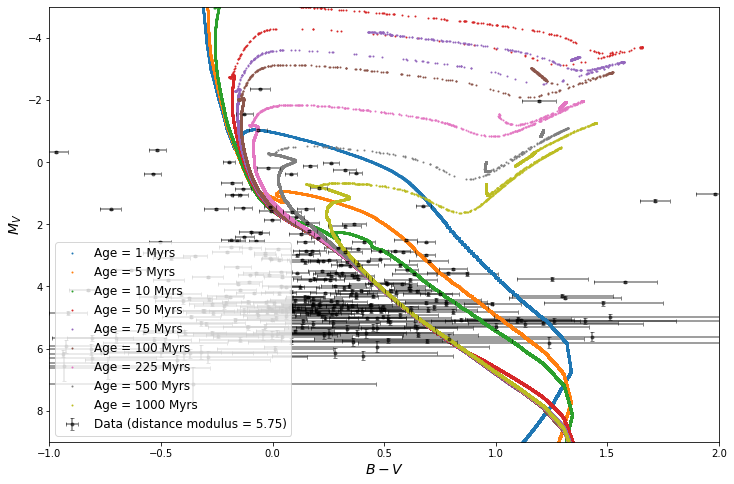

(141.2537544622754, 32.52487893542765)

In [26]:
# estimate the distance modulus

dist_mod = 5.75
dist_mod_err = 0.5

plt.figure(figsize=(12,8))
for age in ages:
    plt.plot(ichrones[age]['B_mag']-ichrones[age]['V_mag'], 
             ichrones[age]['V_mag'], '.', label="Age = {:1.0f} Myrs".format(age/1e6),
            markersize=2)

#plt.plot(B-V, V-dist_mod, '.', label="Data (distance modulus = {})".format(dist_mod), color='k')
plt.errorbar(BV, V-dist_mod, xerr=BVerr, yerr=Verr, label="Data (distance modulus = {})".format(dist_mod), 
             fmt='.', capsize=2, alpha=0.5, color='k')
plt.gca().invert_yaxis()
plt.xlim([-1., 2.]) 
plt.xlabel(r"$B-V$", fontsize=14)
plt.ylabel(r"$M_V$", fontsize=14)
#plt.ylim([13,0])
plt.ylim([9,-5])
plt.legend(fontsize=12)
#plt.savefig('iso_cmd_v1.png', bbox_inches='tight')
plt.show()

get_distance(dist_mod, dist_mod_err)

In [10]:
# based on isochrones above, try to narrow down the age of the cluster

ichrones = {}
ages = [1e7, 5e7, 6e7, 7e7, 8e7, 9e7, 1e8, 2e8, 3e8, 4e8, 5e8, 1e9]

for age in ages:
    ret = tracks.generate(masses, np.log10(age), 
                      feh, distance=distance, AV=0)
    ret = ret.dropna()
    ichrones[age] = ret

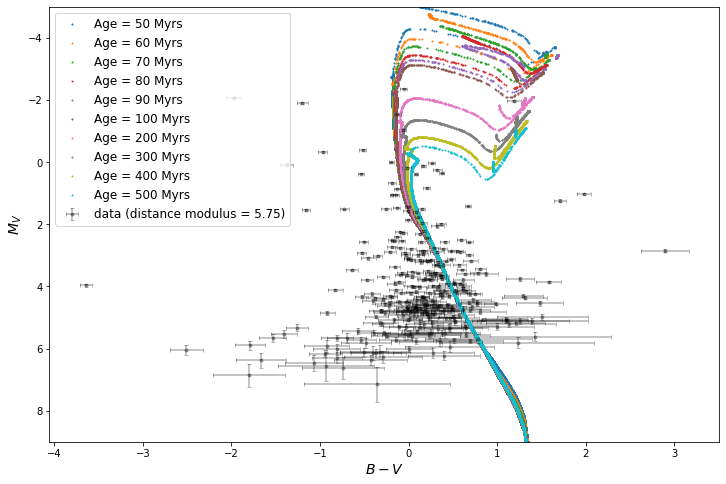

(141.2537544622754, 32.52487893542765)

In [11]:
dist_mod = 5.75 
dist_mod_err = 0.5

plt.figure(figsize=(12,8))
for age in ages[1:-1]:
    plt.plot(ichrones[age]['B_mag']-ichrones[age]['V_mag'], 
             ichrones[age]['V_mag'], '.', label="Age = {:1.0f} Myrs".format(age/1e6),
            markersize=2)

#plt.plot(B-V, V-dist_mod, '.', label="data (V - {})".format(dist_mod), color='k')
plt.errorbar(BV, V-dist_mod, xerr=BVerr, yerr=Verr, label="data (distance modulus = {})".format(dist_mod), 
             fmt='.', capsize=2, alpha=0.3, color='k')
plt.gca().invert_yaxis()
#plt.xlim([-1., 2.]) 
plt.xlabel(r"$B-V$", fontsize=14)
plt.ylabel(r"$M_V$", fontsize=14)
#plt.ylim([13,0])
plt.ylim([9,-5])
plt.legend(fontsize=12)
plt.show()

get_distance(dist_mod, dist_mod_err)

In [27]:
# narrow down age range a little more
ichrones = {}
ages = [5e7, 6e7, 7e7, 8e7, 9e7, 1e8, 1.2e8, 1.4e8, 1.6e8, 1.8e8, 2e8]

for age in ages:
    ret = tracks.generate(masses, np.log10(age), 
                      feh, distance=distance, AV=0)
    ret = ret.dropna()
    ichrones[age] = ret

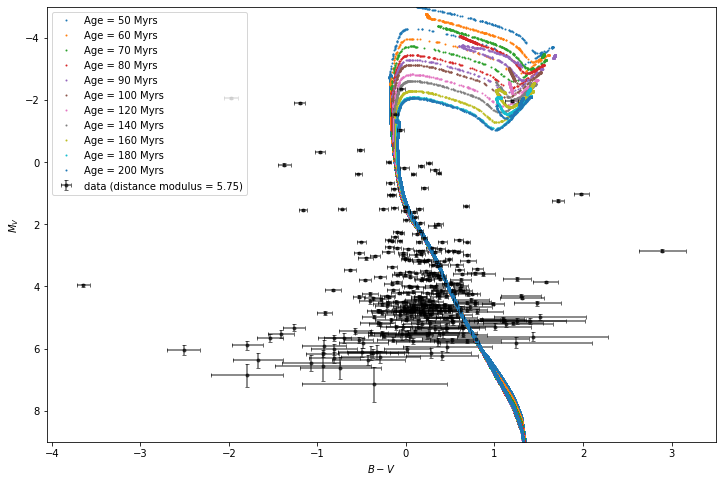

(141.2537544622754, 32.52487893542765)

In [13]:
dist_mod = 5.75
dist_mod_err = 0.5

plt.figure(figsize=(12,8))
for age in ages:
    plt.plot(ichrones[age]['B_mag']-ichrones[age]['V_mag'], 
             ichrones[age]['V_mag'], '.', label="Age = {:1.0f} Myrs".format(age/1e6),
            markersize=2)

#plt.plot(B-V, V-dist_mod, '.', label="data (V - {})".format(dist_mod), color='k')
plt.errorbar(BV, V-dist_mod, xerr=BVerr, yerr=Verr, label="data (distance modulus = {})".format(dist_mod), 
             fmt='.', capsize=2, alpha=0.6, color='k')
plt.gca().invert_yaxis()
#plt.xlim([-1., 2.]) 
plt.xlabel(r"$B-V$")
plt.ylabel(r"$M_V$")
#plt.ylim([13,0])
plt.ylim([9,-5])
plt.legend()
plt.show()

get_distance(dist_mod, dist_mod_err)

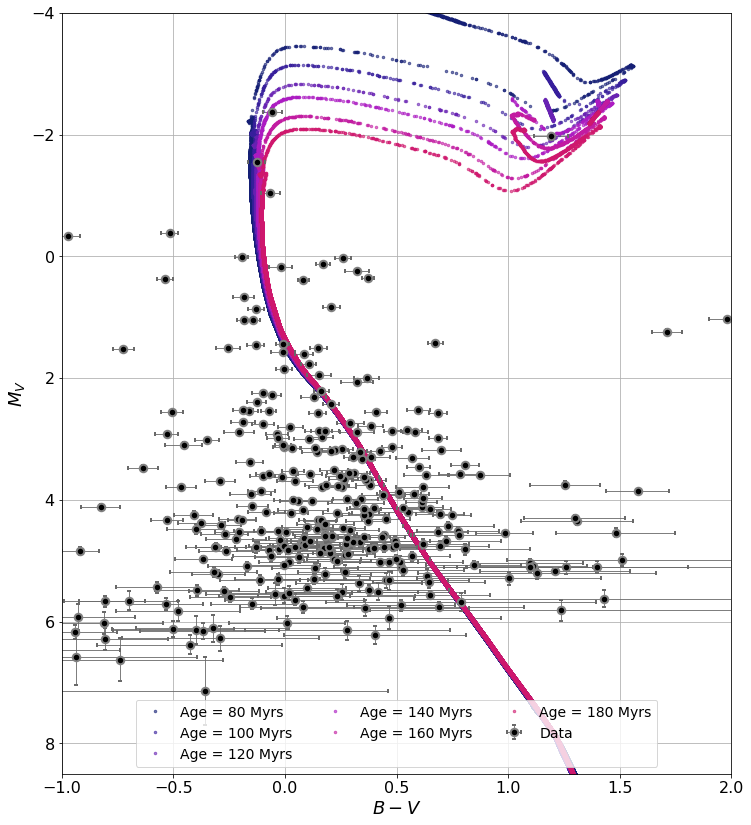

(141.2537544622754, 32.52487893542765)

In [14]:
# make the final plot

dist_mod = 5.75
dist_mod_err = 0.5

colors = ['brown', 'red', 'tab:orange', 'y', 'tab:green',
         'darkgreen', 'darkblue', 'royalblue', 'darkviolet', 
          'mediumvioletred', 'deeppink']

colors = reversed(colors[5:])

colors = ['royalblue', 'darkblue', 'purple','darkviolet', 
          'mediumvioletred', 'deeppink']

colors = ['#151f75', '#371e9c', '#6822b3', '#ac1bc2', '#c21ba1', '#cf176d']#'#c21b69']

#colors = ['#99261c', '#c91f0c', '#d13a0d', '#e04f07', '#e36e00', '#e39000']

plt.figure(figsize=(12,14))
for age, color in zip([ages[3]]+ages[5:-1], colors):
    plt.plot(ichrones[age]['B_mag']-ichrones[age]['V_mag'], 
             ichrones[age]['V_mag'], '.', label="Age = {:1.0f} Myrs".format(age/1e6),
            markersize=5, color=color, alpha=0.6, rasterized=True)

#plt.plot(B-V, V-dist_mod, '.', label="Data (distance modulus = {})".format(dist_mod), color='k')
plt.errorbar(BV, V-dist_mod, xerr=BVerr, yerr=Verr, label="Data", 
             fmt='.', capsize=2, alpha=1, color='k',#'#242424', 
             markersize=15, ecolor='dimgrey', elinewidth=0.85, 
             markeredgecolor='gray', mew=2)
plt.gca().invert_yaxis()
plt.xlim([-1., 2.]) 
plt.xlabel(r"$B-V$", fontsize=18)
plt.ylabel(r"$M_V$", fontsize=18)
#plt.ylim([13,0])
plt.ylim([8.5,-4])
plt.legend(fontsize=14, ncol=3, loc='lower center')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
#plt.savefig('iso_cmd_v5.png', bbox_inches='tight')
plt.show()

get_distance(dist_mod, dist_mod_err)

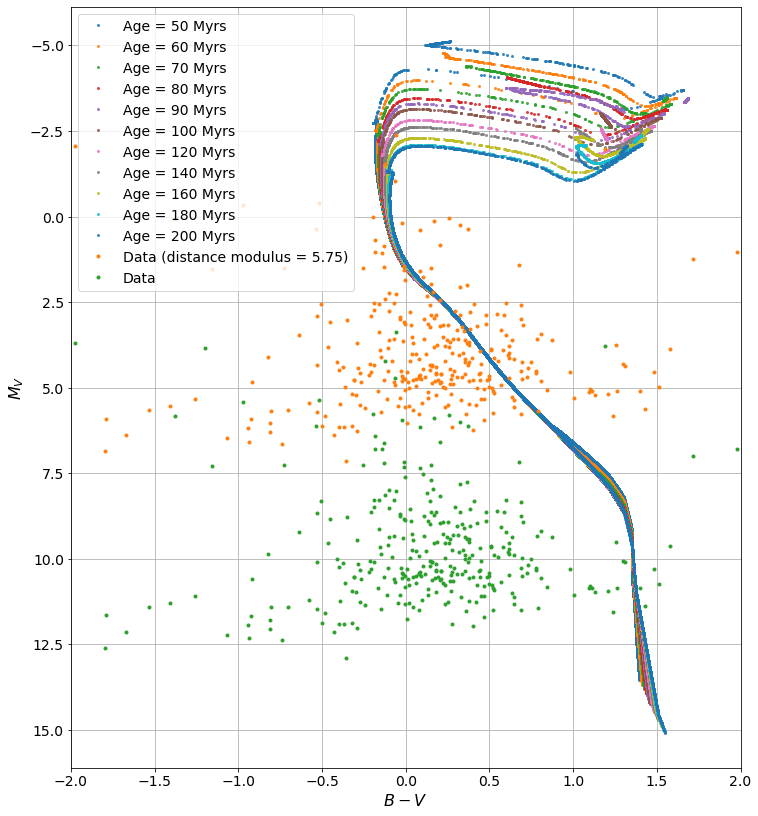

(141.2537544622754, 32.52487893542765)

In [15]:
dist_mod = 5.75
dist_mod_err = 0.5

colors = ['brown', 'red', 'tab:orange', 'y', 'tab:green',
         'darkgreen', 'darkblue', 'royalblue', 'darkviolet', 
          'mediumvioletred', 'deeppink']

colors = reversed(colors[5:])

colors = ['royalblue', 'darkblue', 'purple','darkviolet', 
          'mediumvioletred', 'deeppink']

colors = ['#151f75', '#371e9c', '#6822b3', '#ac1bc2', '#c21ba1', '#cf176d']#'#c21b69']

plt.figure(figsize=(12,14))
for age in ages:
    plt.plot(ichrones[age]['B_mag']-ichrones[age]['V_mag'], 
             ichrones[age]['V_mag'], '.', label="Age = {:1.0f} Myrs".format(age/1e6),
            markersize=4, alpha=0.8)

plt.plot(B-V, V-dist_mod, '.', label="Data (distance modulus = {})".format(dist_mod))
plt.plot(B-V, V, '.', label="Data".format(dist_mod))

#plt.errorbar(BV, V-dist_mod, xerr=BVerr, yerr=Verr, label="Data (distance modulus = {})".format(dist_mod), 
#             fmt='.', capsize=2, alpha=0.85, color='#242424', markersize=10,
#            ecolor='dimgrey', elinewidth=0.85)
plt.gca().invert_yaxis()
plt.xlim([-2., 2.]) 
plt.xlabel(r"$B-V$", fontsize=16)
plt.ylabel(r"$M_V$", fontsize=16)
#plt.ylim([13,0])
#plt.ylim([8,-4])
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.savefig('iso_cmd_v4.pdf', bbox_inches='tight')
plt.show()

get_distance(dist_mod, dist_mod_err)